In [1]:
import pandas as pd
import numpy as np

In [2]:
births = pd.read_csv('births.csv')

In [3]:
births.head()

year  month day gender  births
0  1969      1   1      F    4046
1  1969      1   1      M    4440
2  1969      1   2      F    4454
3  1969      1   2      M    4548
4  1969      1   3      F    4548

In [4]:
births['decade'] = (births['year'] // 10) * 10

In [5]:
births.head()

year  month day gender  births  decade
0  1969      1   1      F    4046    1960
1  1969      1   1      M    4440    1960
2  1969      1   2      F    4454    1960
3  1969      1   2      M    4548    1960
4  1969      1   3      F    4548    1960

In [6]:
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

In [9]:
%matplotlib inline
import matplotlib.pyplot as pp

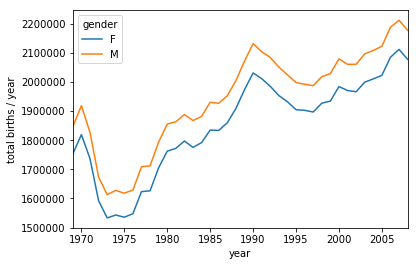

In [13]:
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
pp.ylabel('total births / year')

In [17]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [18]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [19]:
births.head()

year  month day gender  births  decade
0  1969      1   1      F    4046    1960
1  1969      1   1      M    4440    1960
2  1969      1   2      F    4454    1960
3  1969      1   2      M    4548    1960
4  1969      1   3      F    4548    1960

In [20]:
births['day'] = births['day'].astype(int)

In [21]:
births.head()

year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960

In [24]:
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day, format = '%Y%m%d')

In [25]:
births.head()

year  month  day gender  births  decade
1969-01-01  1969      1    1      F    4046    1960
1969-01-01  1969      1    1      M    4440    1960
1969-01-02  1969      1    2      F    4454    1960
1969-01-02  1969      1    2      M    4548    1960
1969-01-03  1969      1    3      F    4548    1960

In [26]:
births['dayofweek'] = births.index.dayofweek

In [27]:
births.head()

year  month  day gender  births  decade  dayofweek
1969-01-01  1969      1    1      F    4046    1960          2
1969-01-01  1969      1    1      M    4440    1960          2
1969-01-02  1969      1    2      F    4454    1960          3
1969-01-02  1969      1    2      M    4548    1960          3
1969-01-03  1969      1    3      F    4548    1960          4

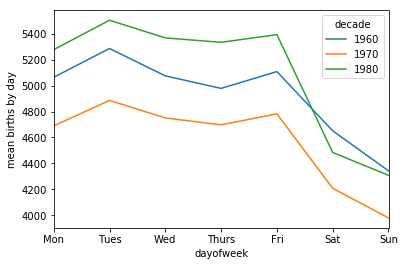

In [29]:
births.pivot_table('births',index='dayofweek',columns='decade',aggfunc='mean').plot()
pp.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
pp.ylabel('mean births by day')

In [30]:
births_by_date = births.pivot_table('births',[births.index.month,births.index.day])
births_by_date.head()

1  1    4009.225
   2    4247.400
   3    4500.900
   4    4571.350
   5    4603.625
Name: births, dtype: float64

In [31]:
births_by_date.index = [pd.datetime(2012,month,day) for (month,day) in births_by_date.index]
births_by_date.head()

2012-01-01    4009.225
2012-01-02    4247.400
2012-01-03    4500.900
2012-01-04    4571.350
2012-01-05    4603.625
Name: births, dtype: float64

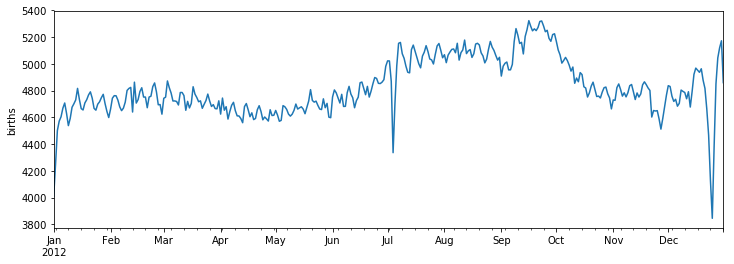

In [35]:
births_by_date.plot(figsize=(12,4))
pp.ylabel('births')


In [36]:
from datetime import datetime